# Comparing similarity measures

In this notebook a comparison between experimental results on humans and different similarity metrics are compared. 

# PENDING...

 - Normalizar todo.. 
 - Respaldar en github...
 - Hacer comparaciones contra individuos especificos de la encuesta (mi respuesta y otras que parezcan coherentes..)
   (PARA ESO debo de MARCAR las preguntas que eliminé...)
 - "Normalizar" datos, en vez de 1 - 6 pasar de 0 a 1... 
 - Hacer un conjunto de prueba hecho por mi, de 20 parejas
 - Comenzar a añadir 'la otra forma' de codificar... hacer algunas pruebas básicas... 
 - Viernes enseñar resultados a Barrón y preguntarle si añado lo de la otra forma de codificar... 


### Importing libraries

In [17]:
import pandas as pd
import nltk
import matplotlib
import matplotlib.pyplot as plt
import numpy

%matplotlib inline

#nltk.download('wordnet')
#nltk.download('wordnet_ic')
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic

## Getting pairs of concepts and its similarity according to humans (average score)

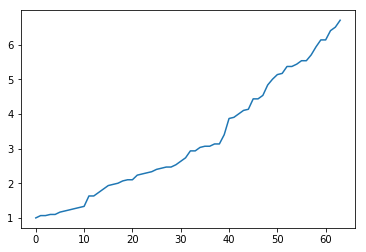

In [30]:
def PairConcepts ():
    "It obtains a list of pairs of concepts"
    df = pd.read_excel('ExperimentalResults_2.xlsx')
    c1 = map(str, list( df['concept 1'] ))
    c2 = map(str, list( df['concept 2'] ))
    return map(list, zip(c1,c2))

def HumanSim (number = None):
    "It gets a list with the average similarity (assigned by humans). If argument 'number' is assigned refers to a specific individual"
    df = pd.read_excel('ExperimentalResults_2.xlsx')
    if number:
        string = 'Q' + str(number)
        ordered = df[string]
#        ordered = df.sort_values(by=string)[string] 
    else:
        ordered = df.sort_values(by='average')['average']
        
    return map(lambda x: round(float(x), 3), list(ordered))

PConcepts = PairConcepts()
Hum_Sim = HumanSim()
# Plotting
plt.plot(Hum_Sim)

# FALTA FORMATO... 

# Q1
#Hum_Sim = HumanSim(1)
# Plotting
#plt.plot(Hum_Sim)


## HD Computing similarity

### Initializing memory and encoding dataset

In [19]:
%run KB_HDComputing.ipynb

# Initializing Memory
Init_mem()

End of initialization
End of encoding


### Comparing pairs of concepts in the HD binary space

[0.058, 0.01, 0.018, 0.024, 0.048, 0.058, 0.057, 0.019, 0.023, 0.03, 0.098, 0.015, 0.066, 0.145, 0.034, 0.088, 0.19, 0.015, 0.054, 0.114, 0.079, 0.022, 0.053, 0.116, 0.096, 0.0, 0.084, 0.107, 0.03, 0.1, 0.047, 0.085, 0.059, 0.26, 0.188, 0.117, 0.141, 0.056, 0.132, 0.072, 0.166, 0.179, 0.128, 0.141, 0.128, 0.218, 0.218, 0.2, 0.267, 0.116, 0.148, 0.21, 0.186, 0.211, 0.219, 0.112, 0.315, 0.168, 0.198, 0.243, 0.189, 0.191, 0.33, 0.373]


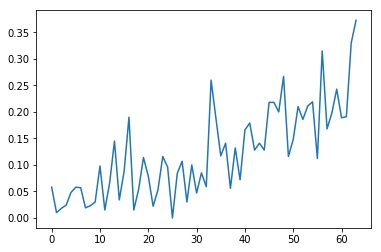

In [20]:
HD_sim = []
for cc in PConcepts:
    HD_sim.append( HDvector.dist(Dict[cc[0]].getPointer(), Dict[cc[1]].getPointer()) )
    
#Normalizing...
HD_sim = map(lambda x: round(1. - x/float( max(HD_sim)) , 3), HD_sim)
print HD_sim

# Plotting
plt.plot(HD_sim)

## McRae similarity

The following cells consult the similarity for each pair of concepts in the distance matrix provided.

[0.134, 0.0, 0.0, 0.0, 0.0, 0.306, 0.03, 0.0, 0.0, 0.0, 0.104, 0.0, 0.017, 0.514, 0.0, 0.031, 0.159, 0.0, 0.026, 0.158, 0.035, 0.0, 0.039, 0.202, 0.149, 0.0, 0.093, 0.222, 0.0, 0.325, 0.022, 0.082, 0.037, 0.336, 0.377, 0.121, 0.138, 0.02, 0.29, 0.044, 0.149, 0.477, 0.323, 0.284, 0.17, 0.425, 0.35, 0.323, 0.395, 0.119, 0.374, 0.715, 0.227, 0.405, 0.34, 0.192, 0.546, 0.382, 0.511, 0.546, 0.204, 0.319, 0.411, 0.62]


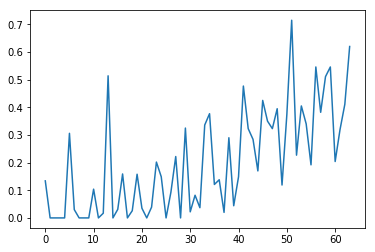

In [21]:
def McRae_simi (pair_concepts):
    "Given a pair of concepts (in a list) it consults the similarity from the cos_matrix... file"
    try: 
        df = pd.read_excel(pathh + 'cos_matrix_brm_IFR.xlsx','1st_200')
        return list(df.loc[df['CONCEPT'] == pair_concepts[0]][pair_concepts[1]])[0]
    except:
        try:
            df = pd.read_excel(pathh + 'cos_matrix_brm_IFR.xlsx','2nd_200')
            return list(df.loc[df['CONCEPT'] == pair_concepts[0]][pair_concepts[1]])[0]
        except:
            df = pd.read_excel(pathh + 'cos_matrix_brm_IFR.xlsx','last_141')
            return list(df.loc[df['CONCEPT'] == pair_concepts[0]][pair_concepts[1]])[0]


# Loop over all pairs...
McRae_sim = []
for cc in PConcepts:
    McRae_sim.append( McRae_simi(cc) )

print McRae_sim
plt.plot(McRae_sim)

In [22]:
# COMPARAR AQUI CONTRA LOS DE NLTK...
# DAR FORMATO A GRAFICAS...
# CORRELACIÓN...

## NTLK Library functions

### Auxiliary functions

In [23]:
brown_ic = wordnet_ic.ic('ic-brown.dat')

def get_synset (concept):
    "Given a concept name (string) it returns its synset (string)"
    # Dataframe for excel document
    df = pd.read_excel(pathh + 'CONCS_Synset_brm.xlsx') #../McRaedataset/CONCS_Synset_brm.xlsx')
    row = df.loc[df['Concept'] == concept]
    return str(list(row['Synset'] )[0])

def similarity_fun ( similarity_metric, pair, corpus = None):
    "Given a similarity_metric function it returns a list of the num closest concepts to 'concept'"
    c_synset_1 = wn.synset( get_synset(pair[0]))
    c_synset_2 = wn.synset( get_synset(pair[1]))
    if corpus:
        return round(similarity_metric(c_synset_1, c_synset_2, corpus), 3)
    else:
        return round(similarity_metric(c_synset_1, c_synset_2), 3)

## Similarity metrics

[0.25, 0.125, 0.167, 0.125, 0.333, 0.125, 0.333, 0.2, 0.091, 0.167, 0.333, 0.25, 0.25, 0.143, 0.1, 0.333, 0.167, 0.2, 0.25, 0.077, 0.1, 0.25, 0.25, 0.25, 0.167, 0.2, 0.2, 0.25, 0.111, 0.333, 0.333, 0.2, 0.25, 0.143, 0.167, 0.25, 0.25, 0.25, 0.167, 0.167, 0.1, 0.083, 0.25, 0.125, 0.1, 0.25, 0.2, 0.2, 0.143, 0.2, 0.111, 0.333, 0.143, 0.5, 0.25, 0.167, 0.333, 0.5, 0.333, 0.333, 0.333, 0.5, 0.25, 0.333]
[2.251, 1.558, 1.846, 1.558, 2.539, 1.558, 2.539, 2.028, 1.24, 1.846, 2.539, 2.251, 2.251, 1.692, 1.335, 2.539, 1.846, 2.028, 2.251, 1.073, 1.335, 2.251, 2.251, 2.251, 1.846, 2.028, 2.028, 2.251, 1.44, 2.539, 2.539, 2.028, 2.251, 1.692, 1.846, 2.251, 2.251, 2.251, 1.846, 1.846, 1.335, 1.153, 2.251, 1.558, 1.335, 2.251, 2.028, 2.028, 1.692, 2.028, 1.44, 2.539, 1.692, 2.944, 2.251, 1.846, 2.539, 2.944, 2.539, 2.539, 2.539, 2.944, 2.251, 2.539]
[0.824, 0.588, 0.737, 0.632, 0.875, 0.588, 0.875, 0.75, 0.5, 0.706, 0.875, 0.824, 0.824, 0.667, 0.571, 0.889, 0.706, 0.75, 0.842, 0.455, 0.571, 0.842, 

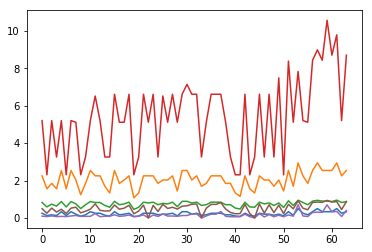

In [24]:
# Path similarity
Path_sim = []
for pair in PConcepts:
    Path_sim.append(similarity_fun(wn.path_similarity, pair))
print Path_sim

LC_sim = []
for pair in PConcepts:
    LC_sim.append(similarity_fun(wn.lch_similarity, pair))
print LC_sim

WUP_sim = []
for pair in PConcepts:
    WUP_sim.append(similarity_fun(wn.wup_similarity, pair))
print WUP_sim

# Information Content
Res_sim = []
for pair in PConcepts:
    Res_sim.append(similarity_fun(wn.res_similarity, pair, brown_ic))
print Res_sim

JC_sim = []
for pair in PConcepts:
    JC_sim.append(similarity_fun(wn.jcn_similarity, pair, brown_ic))
print JC_sim

Lin_sim = []
for pair in PConcepts:
    Lin_sim.append(similarity_fun(wn.lin_similarity, pair, brown_ic))
print Lin_sim

plt.plot(Path_sim)
plt.plot(LC_sim)
plt.plot(WUP_sim)
plt.plot(Res_sim)
plt.plot(JC_sim)
plt.plot(Lin_sim)

## Correlations

Using correlation to compare obtained similarity values from different metrics

(1.0, 0.0) 1.0 6.7
(0.8006728271653208, 2.003810511186428e-15) 0.0 0.373
(0.7138997493082799, 3.545372050211836e-11) 0.0 0.715
(0.3624448743565742, 0.0032484535844326066) 0.077 0.5
(0.3084103710673558, 0.01315966378188511) 1.073 2.944
(0.2796577168098036, 0.02521928975683012) 0.455 0.952
(0.46856953516085303, 9.424913703639827e-05) 2.306 10.574
(0.4784482047797415, 6.366141703811721e-05) 0.0 0.705
(0.3608723878036907, 0.003395222004515289) 0.0 0.936


(1.0, 0.0) 1.0 9.0
(0.6995151996230179, 1.273349400455091e-10) 0.0 0.373
(0.6075957622790953, 1.0154929334905342e-07) 0.0 0.715
(0.3709334431190425, 0.0025493476732868572) 0.077 0.5
(0.36255284598612386, 0.0032385860656633883) 1.073 2.944
(0.36332131658793765, 0.0031691217363656074) 0.455 0.952
(0.5439912817279654, 3.385776021850763e-06) 2.306 10.574
(0.46252219732759264, 0.00011913811820940126) 0.0 0.705
(0.42565497058804524, 0.0004540448271955902) 0.0 0.936


(1.0, 0.0) 1.0 9.0
(0.735674987162895, 4.3806113672073635e-12) 0.0 0.373
(0.67

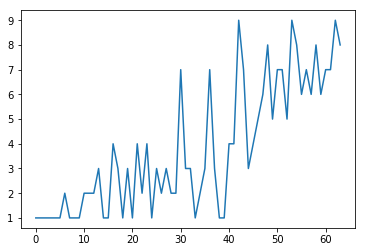

In [31]:
from scipy.stats.stats import pearsonr   

# vs Average
print pearsonr(Hum_Sim, Hum_Sim), min(Hum_Sim), max(Hum_Sim)
print pearsonr(Hum_Sim, HD_sim), min(HD_sim), max(HD_sim)
print pearsonr(Hum_Sim, McRae_sim), min(McRae_sim), max(McRae_sim)
print pearsonr(Hum_Sim, Path_sim), min(Path_sim), max(Path_sim)
print pearsonr(Hum_Sim, LC_sim), min(LC_sim), max(LC_sim)
print pearsonr(Hum_Sim, WUP_sim), min(WUP_sim), max(WUP_sim)
print pearsonr(Hum_Sim, Res_sim), min(Res_sim), max(Res_sim)
print pearsonr(Hum_Sim, JC_sim), min(JC_sim), max(JC_sim)
print pearsonr(Hum_Sim, Lin_sim), min(Lin_sim), max(Lin_sim)

# vs Q1
Hum_Sim = HumanSim(1)
print "\n\n", pearsonr(Hum_Sim, Hum_Sim), min(Hum_Sim), max(Hum_Sim)
print pearsonr(Hum_Sim, HD_sim), min(HD_sim), max(HD_sim)
print pearsonr(Hum_Sim, McRae_sim), min(McRae_sim), max(McRae_sim)
print pearsonr(Hum_Sim, Path_sim), min(Path_sim), max(Path_sim)
print pearsonr(Hum_Sim, LC_sim), min(LC_sim), max(LC_sim)
print pearsonr(Hum_Sim, WUP_sim), min(WUP_sim), max(WUP_sim)
print pearsonr(Hum_Sim, Res_sim), min(Res_sim), max(Res_sim)
print pearsonr(Hum_Sim, JC_sim), min(JC_sim), max(JC_sim)
print pearsonr(Hum_Sim, Lin_sim), min(Lin_sim), max(Lin_sim)

# vs Q5
Hum_Sim = HumanSim(5)
print "\n\n", pearsonr(Hum_Sim, Hum_Sim), min(Hum_Sim), max(Hum_Sim)
print pearsonr(Hum_Sim, HD_sim), min(HD_sim), max(HD_sim)
print pearsonr(Hum_Sim, McRae_sim), min(McRae_sim), max(McRae_sim)
print pearsonr(Hum_Sim, Path_sim), min(Path_sim), max(Path_sim)
print pearsonr(Hum_Sim, LC_sim), min(LC_sim), max(LC_sim)
print pearsonr(Hum_Sim, WUP_sim), min(WUP_sim), max(WUP_sim)
print pearsonr(Hum_Sim, Res_sim), min(Res_sim), max(Res_sim)
print pearsonr(Hum_Sim, JC_sim), min(JC_sim), max(JC_sim)
print pearsonr(Hum_Sim, Lin_sim), min(Lin_sim), max(Lin_sim)

# vs Q15
Hum_Sim = HumanSim(15)
print "\n\n", pearsonr(Hum_Sim, Hum_Sim), min(Hum_Sim), max(Hum_Sim)
print pearsonr(Hum_Sim, HD_sim), min(HD_sim), max(HD_sim)
print pearsonr(Hum_Sim, McRae_sim), min(McRae_sim), max(McRae_sim)
print pearsonr(Hum_Sim, Path_sim), min(Path_sim), max(Path_sim)
print pearsonr(Hum_Sim, LC_sim), min(LC_sim), max(LC_sim)
print pearsonr(Hum_Sim, WUP_sim), min(WUP_sim), max(WUP_sim)
print pearsonr(Hum_Sim, Res_sim), min(Res_sim), max(Res_sim)
print pearsonr(Hum_Sim, JC_sim), min(JC_sim), max(JC_sim)
print pearsonr(Hum_Sim, Lin_sim), min(Lin_sim), max(Lin_sim)

# vs Q25
Hum_Sim = HumanSim(25)
print "\n\n", pearsonr(Hum_Sim, Hum_Sim), min(Hum_Sim), max(Hum_Sim)
print pearsonr(Hum_Sim, HD_sim), min(HD_sim), max(HD_sim)
print pearsonr(Hum_Sim, McRae_sim), min(McRae_sim), max(McRae_sim)
print pearsonr(Hum_Sim, Path_sim), min(Path_sim), max(Path_sim)
print pearsonr(Hum_Sim, LC_sim), min(LC_sim), max(LC_sim)
print pearsonr(Hum_Sim, WUP_sim), min(WUP_sim), max(WUP_sim)
print pearsonr(Hum_Sim, Res_sim), min(Res_sim), max(Res_sim)
print pearsonr(Hum_Sim, JC_sim), min(JC_sim), max(JC_sim)
print pearsonr(Hum_Sim, Lin_sim), min(Lin_sim), max(Lin_sim)

# vs Q30
Hum_Sim = HumanSim(30)
print "\n\n", pearsonr(Hum_Sim, Hum_Sim), min(Hum_Sim), max(Hum_Sim)
print pearsonr(Hum_Sim, HD_sim), min(HD_sim), max(HD_sim)
print pearsonr(Hum_Sim, McRae_sim), min(McRae_sim), max(McRae_sim)
print pearsonr(Hum_Sim, Path_sim), min(Path_sim), max(Path_sim)
print pearsonr(Hum_Sim, LC_sim), min(LC_sim), max(LC_sim)
print pearsonr(Hum_Sim, WUP_sim), min(WUP_sim), max(WUP_sim)
print pearsonr(Hum_Sim, Res_sim), min(Res_sim), max(Res_sim)
print pearsonr(Hum_Sim, JC_sim), min(JC_sim), max(JC_sim)
print pearsonr(Hum_Sim, Lin_sim), min(Lin_sim), max(Lin_sim)

plt.plot(Hum_Sim)